<a href="https://colab.research.google.com/github/profmcnich/example_notebook/blob/main/cats_example_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# My Awesome Machine Learning Notebook

## Abstract

**Requirements:**
+ Talk about what datasets you've selected for your notebook
+ Include why you choose these datasets
+ Talk about the classification algorithm you plan to use
+ Mention what you hope to find over the course of this notebook

I like ice-cream so I found a dataset on ice-cream and decided to do a linear regression to predict the amount of revenue you would gain on a given day provided the temperature.

For the classification I thought it would be cool if I could categorize people as high risk or not high risk for stroke based on certain attributes so I decided to do just that.

## Section 1: Prepping the Regression datasets
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **"head"** of the data
+ For the columns you will be using in your regression, describe their setup in more detail
+ Clean the data if needed using pandas

The dataset contains two columns, one for the temperature on a given day and one for the revenue on that same day.

Now it's time to use pandas to load and clean up my data.

In [1]:
# Use pandas to load your dataset and output the first 15 rows
import pandas as pd

ice_cream = pd.read_csv("data/ice-cream-data.csv")
ice_cream.head(15)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


Let me give a bit more detail on my columns:

1. **Temperature** - Measures the average temperature on a given day in Celsius
2. **Revenue** - What we're trying to predict, this is how much revenue, in dollars was gained on a given day

Now while this data is great and all, I dont really like the temperature being measured in Celsius. There is nothing wrong with using Celsius, but it is a little too difficult for my American brain to understand so let's convert it to Fahrenheit.
    

In [2]:
# Use pandas to clean out data cells that have invalid values for columns of interest

def convert_c_to_f(x):
    x = x * 1.8 + 32
    return float(x)

ice_cream["Temperature"] = ice_cream["Temperature"].apply(convert_c_to_f)

ice_cream.head(15)

,Temperature,Revenue
0,76.220392,534.799028
1,78.809344,625.190122
2,82.022997,660.632289
3,69.071603,487.706960
4,52.706296,316.240194
5,57.834525,367.940744
6,56.674004,308.894518
7,87.501173,696.716640
8,33.758366,55.390338
9,89.005036,737.800824


So fresh and so clean!

## Section 2: Linear Regression
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ Fit a linear regression to your training set
+ Visualize the regressor using matplotlib
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.

Normally we would extract features here but since we only have two columns there is nothing to extract.

In [3]:
# Use pandas to extract features and prediction sets from our dataframe

Nice and then we use sklearn to create a training set and test set. I will reserve 20% of the dataset for testing.

In [4]:
# Use sklearn to split our dataset
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ice_cream["Temperature"], ice_cream["Revenue"], test_size = .2)

Let's use that training set and fit a Linear Regression to it:

In [5]:
# Use sklearn to create and Linear Regressor and fit our data to it

from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

To make sure we're on the right track let's try a couple made up sample inputs and see what our model returns:

In [6]:
# experiment with the regressor

print("If it was 100 degress F we predict $" + str(round(reg.predict([[100]])[0], 2)))
print("If it was 75 degress F we predict $" + str(round(reg.predict([[75]])[0], 2)))
print("If it was 50 degress F we predict $" + str(round(reg.predict([[50]])[0], 2)))
print("If it was 32 degress F we predict $" + str(round(reg.predict([[32]])[0], 2)))

If it was 100 degress F we predict $852.87
If it was 75 degress F we predict $556.81
If it was 50 degress F we predict $260.74
If it was 32 degress F we predict $47.58


Now lets plot out linear regression. The blue dots represent training data, the green dots represent test data, and the red line is the regression line.

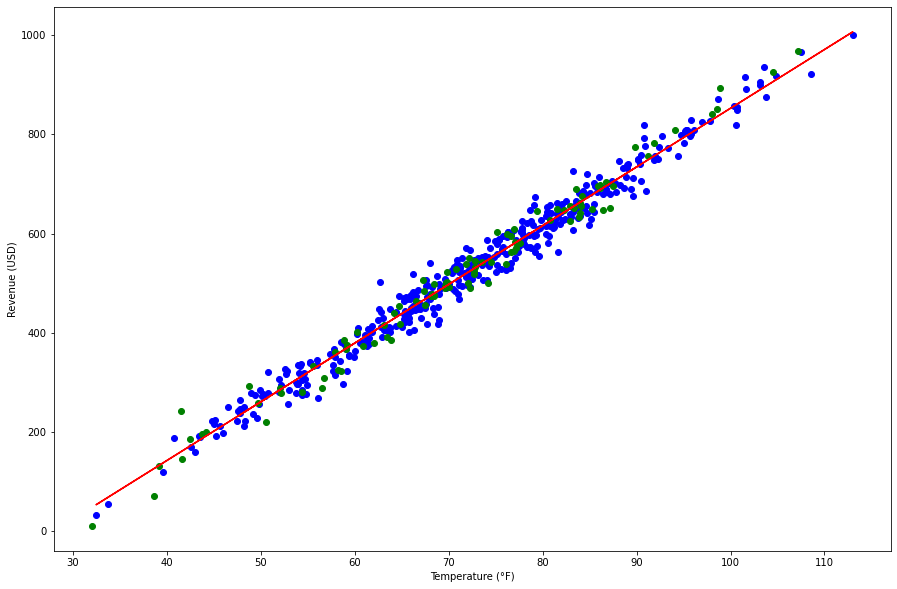

In [7]:
# Use matplotlib (or other visualization lib) to create a scatter plot and the regression to create a regression line

import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.xlabel("Temperature (°F)")
plt.ylabel("Revenue (USD)")
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_train, reg.predict(x_train.values.reshape(-1,1)), color='red')
plt.show()

Very spicy. Now let's see what my awesome ML model predicts for the training set and how well it performed:

In [8]:
# Use linear regression model to report accuracy/error rate on the test set
from sklearn import metrics

y_predicted = reg.predict(x_test.values.reshape(-1,1))
print("The model has an accuracy of", str(round(metrics.r2_score(y_test, y_predicted) * 100, 2)) + "%")

The model has an accuracy of 98.23%


Awesome! It's possible I just got lucky though. Let me do some further analysis to see how well this works

In [9]:
# Potentially perform further analysis, one good angle is k-fold cross validation or trying a different regression
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, ice_cream["Temperature"].values.reshape(-1,1), ice_cream["Revenue"].values.reshape(-1,1), cv=5)
print("%0.2f%% accuracy from 5-fold cross validation" % (scores.mean() * 100))

97.88% accuracy from 5-fold cross validation


So it looks like our model is pretty accurate.

## Section 3: Prepping the classification dataset
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **head** of the data
+ For the columns you will be using in your classification, describe the range of values
+ For those columns map the values to a set of integers (if they aren't already)
+ Clean the data using pandas if needed

For the classification section I choose a dataset that contains health information, including whether or not the person has had a stroke previously. I hope to use the various pieces of health information to train a model that can classify people as high risk or not high risk for stroke. The three columns that I will focus on as as follows:

1. Age - The person's age
2. BMI - The person's body mass index which is derived from a persons height and weight to determine if they are at a heathly weight for their height
3. Sex - possible values: 'Male', 'Female' (Referred to as Gender in data)

I want my classifier to output a 1 for someone who is at a high risk for stroke and a 0 for someone who is not at a high risk.

I will have to clean the data because there are some entries with N/A as a value, and that is something I do not want. There are also some other issues I will take care when cleaning the data.

I also will be mapping Male to 0 and Female to 1.

In [10]:
# Use pandas to load dataset, clean dataset, and output the first 15 rows
stroke_data = pd.read_csv("data/stroke-data.csv")
stroke_data = stroke_data[["age", "bmi", "gender", "stroke"]]

def gender_map(x):
    if x == "Male":
        return 0
    if x == "Female":
        return 1

stroke_data["age"] = stroke_data["age"].apply(pd.to_numeric)
stroke_data["bmi"] = stroke_data["bmi"].apply(pd.to_numeric)
stroke_data["gender"] = stroke_data["gender"].apply(gender_map)
stroke_data["gender"] = stroke_data["gender"].apply(pd.to_numeric)
stroke_data = stroke_data.dropna()
stroke_data.head(15)

,age,bmi,gender,stroke
0,67.0,36.6,0.0,1
2,80.0,32.5,0.0,1
3,49.0,34.4,1.0,1
4,79.0,24.0,1.0,1
5,81.0,29.0,0.0,1
6,74.0,27.4,0.0,1
7,69.0,22.8,1.0,1
9,78.0,24.2,1.0,1
10,81.0,29.7,1.0,1
11,61.0,36.8,1.0,1


## Section 4: Classification with a Neural Network (or classifier of choice)
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ **(Situational)** Scale your data to prevent overfitting
+ Fit a classifier to your training set
+ **(Optional)** visualize the classifier on a data plot
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.


Now we can train our model to use age, bmi, and gender to predict if a person is at a high risk for stroke.

Once again let's split out our data into a training and test set. I will hold 20% of the data for testing.

In [11]:
# Use sklearn to split our dataset
x_train, x_test, y_train, y_test = train_test_split(stroke_data[["age", "bmi", "gender"]], stroke_data["stroke"], test_size = .2)

Before we train we also need to scale our data for our neural network. This is because neural networks are suspetible to overfitting on features that have a higher magnitude. To scale this data I will use a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [12]:
# Use sklearn to scale your feature vector (if you use a neural network)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

Alright now that our data is ready, let's create our classifier. For this project I will use a SVM.

In [13]:
# Initialize SVM
from sklearn import svm

clf = svm.SVC()

Now let's train this SVM.

In [14]:
# Fit the network and do a sample
clf.fit(x_train, y_train)
if clf.predict([[21, 20, 0]])[0] == 0:
    print("A 21 year old male with a BMI of 20 is not at a high risk for stroke")
else:
    print("A 21 year old male with a BMI of 20 is at a high risk for stroke")

A 21 year old male with a BMI of 20 is not at a high risk for stroke


Once again let's analyze the accuracy of our machine learning. Here is the accuracy for the test set.

In [15]:
# Report on the accuracy of the Test set for your classifier

predicted_y = clf.predict(x_test)
print("My model has an accuracy of "+ str(round(metrics.accuracy_score(y_test, predicted_y) * 100, 2)) + "%")

My model has an accuracy of 95.82%


And just as before let's do a k-fold cross validation to see if we didn't just get lucky (or unlucky on our first go).

In [16]:
# Just as in Section 2, perform more analysis, try different neural network architectures or ways of splitting the data

scores = cross_val_score(clf, stroke_data[["age", "bmi", "gender"]], stroke_data["stroke"], cv=5)
print("%0.2f%% accuracy from 5-fold cross validation" % (scores.mean() * 100))

95.74% accuracy from 5-fold cross validation


Based on the results we can see that age, bmi, and gender are a good predictor of whether or not someone is at a high risk for stroke.

## Conclusions
**Requirements:**
+ Summarize the findings of your report
+ Repeat your methodology and key findings for Section 2. and Section 4.
+ Highlight what you found interesting
+ Discuss what you would do to extend the project further


Here I summarize what I did in this report. Highlighting what I did, what I found interesting or surprising. I sum up and conclusions and what I would do to extend this project further in a V2.